# Bivariate Analysis

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fuel_econ = pd.read_csv("fuel-econ.csv")
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


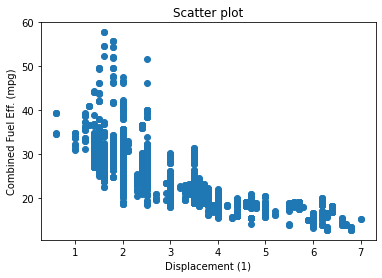

In [20]:
# Scatter plot
plt.scatter(data = fuel_econ, x = "displ", y = "comb")
plt.xlabel("Displacement (1)")
plt.ylabel("Combined Fuel Eff. (mpg)")
plt.title("Scatter plot");

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

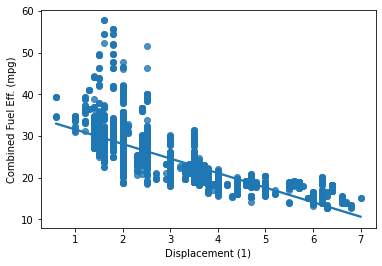

In [21]:
sns.regplot(data = fuel_econ, x = "displ", y = "comb")
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Plot the regression line on the transformed data

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


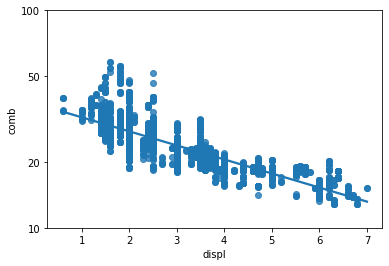

In [22]:
import numpy as np

def log_trans(x , inverse = False):
    if not inverse:
        return np.log10(x)
    
    else:
        return np.power(10, x)


sns.regplot(fuel_econ["displ"], fuel_econ["comb"].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

 Overplotting, Transparency, and Jitter

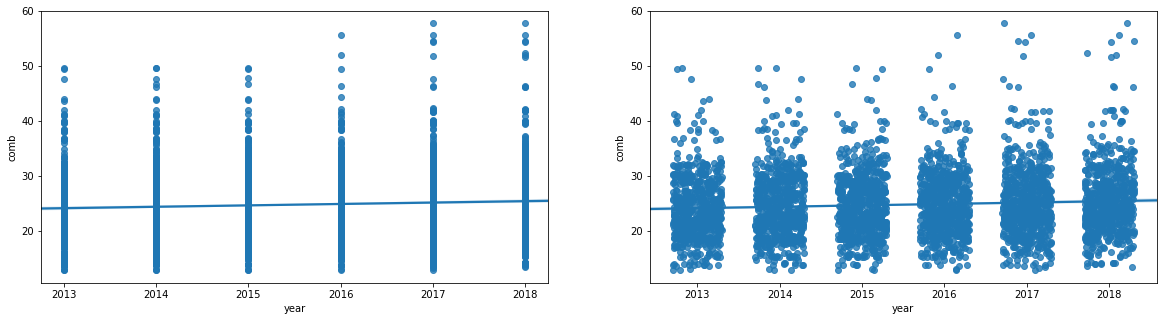

In [23]:
plt.figure(figsize=[20,5])

# plot on left- simple scatter
plt.subplot(1,2,1)
sns.regplot(data = fuel_econ, x = "year", y = "comb", truncate=False);

# plot on right - Scatter plot with jitter
plt.subplot(1,2,2)

sns.regplot(data = fuel_econ, x = "year", y = "comb", truncate=False, x_jitter=0.3);

Plot with both Jitter and Transparency


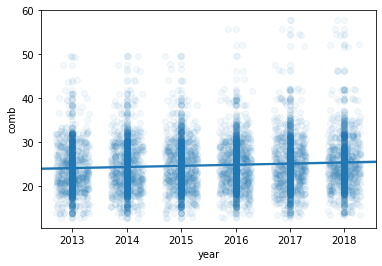

In [24]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/20);

Heat Maps

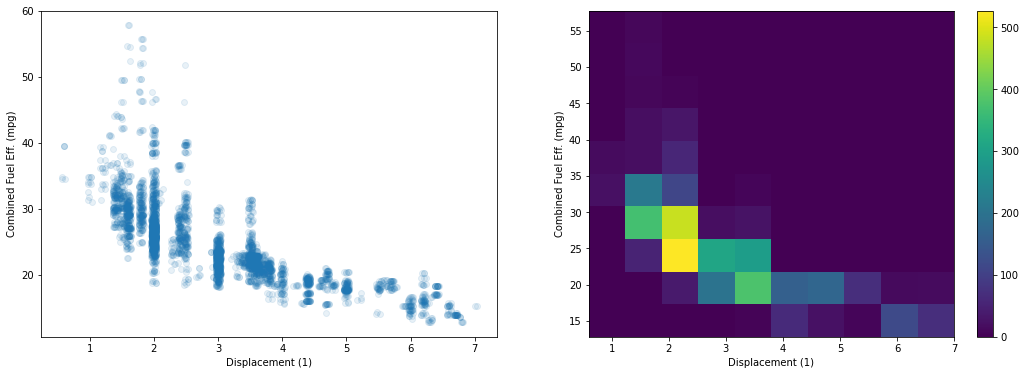

In [25]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sns.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

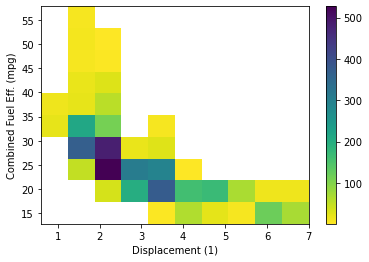

In [26]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

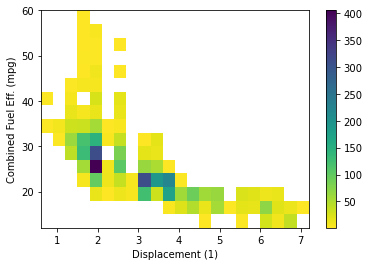

In [27]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot.

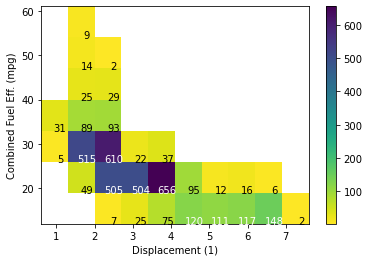

In [28]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

Clustered Bar Charts


In [29]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ["VClass"]


0       Subcompact Cars
1          Compact Cars
2          Compact Cars
3          Compact Cars
4          Midsize Cars
             ...       
3924       Midsize Cars
3925       Midsize Cars
3926       Midsize Cars
3927       Midsize Cars
3928       Midsize Cars
Name: VClass, Length: 3929, dtype: object

In [30]:

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ["VClass"] = fuel_econ["VClass"].astype(vclasses);
fuel_econ["VClass"]

0       Subcompact Cars
1          Compact Cars
2          Compact Cars
3          Compact Cars
4          Midsize Cars
             ...       
3924       Midsize Cars
3925       Midsize Cars
3926       Midsize Cars
3927       Midsize Cars
3928       Midsize Cars
Name: VClass, Length: 3929, dtype: category
Categories (5, object): ['Minicompact Cars' < 'Subcompact Cars' < 'Compact Cars' < 'Midsize Cars' < 'Large Cars']

In [35]:
# The existing `trans` column has multiple sub-types of Automatic and Manual. 
# But, we need plain two types, either Automatic or Manual. Therefore, add a new column. 

# The Series.apply() method invokes the `lambda` function on each value of `trans` column.
# In python, a `lambda` function is an anonymous function that can have only one expression.

fuel_econ["trans"].value_counts()

Automatic (S8)                      814
Automatic (S6)                      739
Manual 6-spd                        658
Automatic (AM-S7)                   226
Automatic 7-spd                     212
Automatic (variable gear ratios)    178
Automatic 8-spd                     138
Automatic 6-spd                     126
Manual 5-spd                        126
Automatic (S7)                       98
Automatic (AM-S6)                    91
Manual 7-spd                         77
Automatic (AM6)                      75
Automatic (AM7)                      63
Automatic 9-spd                      62
Automatic (AV-S6)                    43
Automatic (AV-S7)                    43
Automatic 5-spd                      33
Automatic (AM-S8)                    27
Automatic 4-spd                      25
Automatic (AV-S8)                    22
Automatic (S5)                       14
Automatic (S9)                       14
Automatic (S10)                      13
Automatic (A1)                        7


In [36]:
fuel_econ["trans_type"] = fuel_econ["trans"].apply(lambda x:x.split()[0])
fuel_econ["trans_type"].value_counts()

Automatic    3068
Manual        861
Name: trans_type, dtype: int64

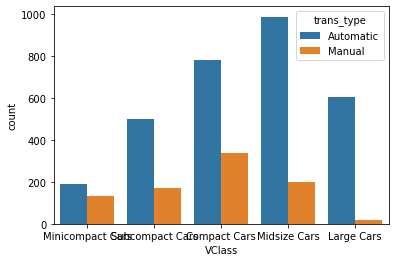

In [37]:
sns.countplot(data = fuel_econ, x = "VClass", hue = "trans_type");

Example 2. Plot a Heat Map between two qualitative variables

In [39]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = fuel_econ.groupby(["VClass", "trans_type"]).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [42]:
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name="count")
ct_counts

TypeError: DataFrame.reset_index() got an unexpected keyword argument 'name'

In [43]:
# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')

<AxesSubplot:xlabel='trans_type', ylabel='VClass'>

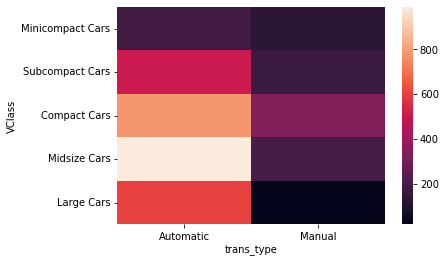

In [44]:
sns.heatmap(ct_counts)

<AxesSubplot:xlabel='trans_type', ylabel='VClass'>

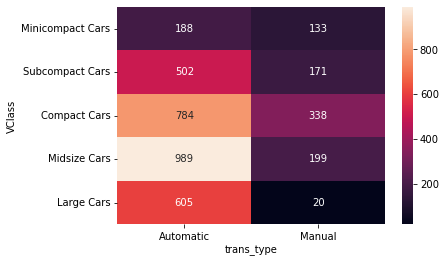

In [46]:
sns.heatmap(ct_counts, annot = True, fmt = 'd')

Faceting

In [47]:
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

In [48]:
fuel_econ["VClass"].unique()

['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars', 'Minicompact Cars']
Categories (5, object): ['Minicompact Cars' < 'Subcompact Cars' < 'Compact Cars' < 'Midsize Cars' < 'Large Cars']

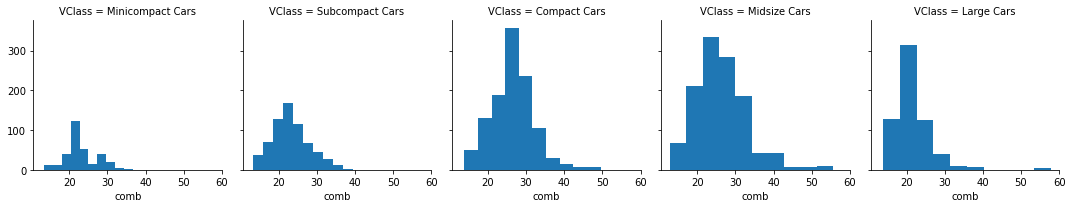

In [49]:
g = sns.FacetGrid(data= fuel_econ, col = "VClass")
g.map(plt.hist, "comb")

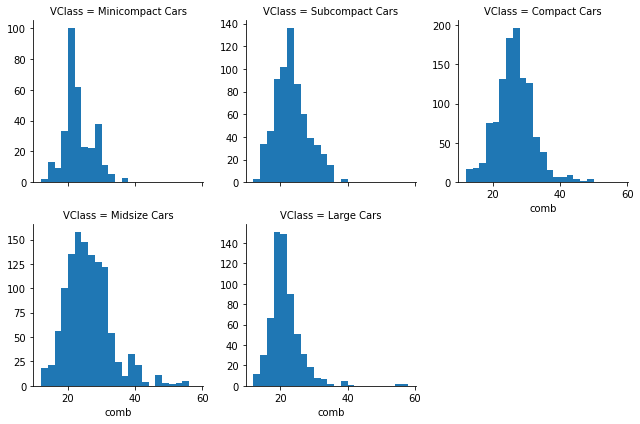

In [51]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sns.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);

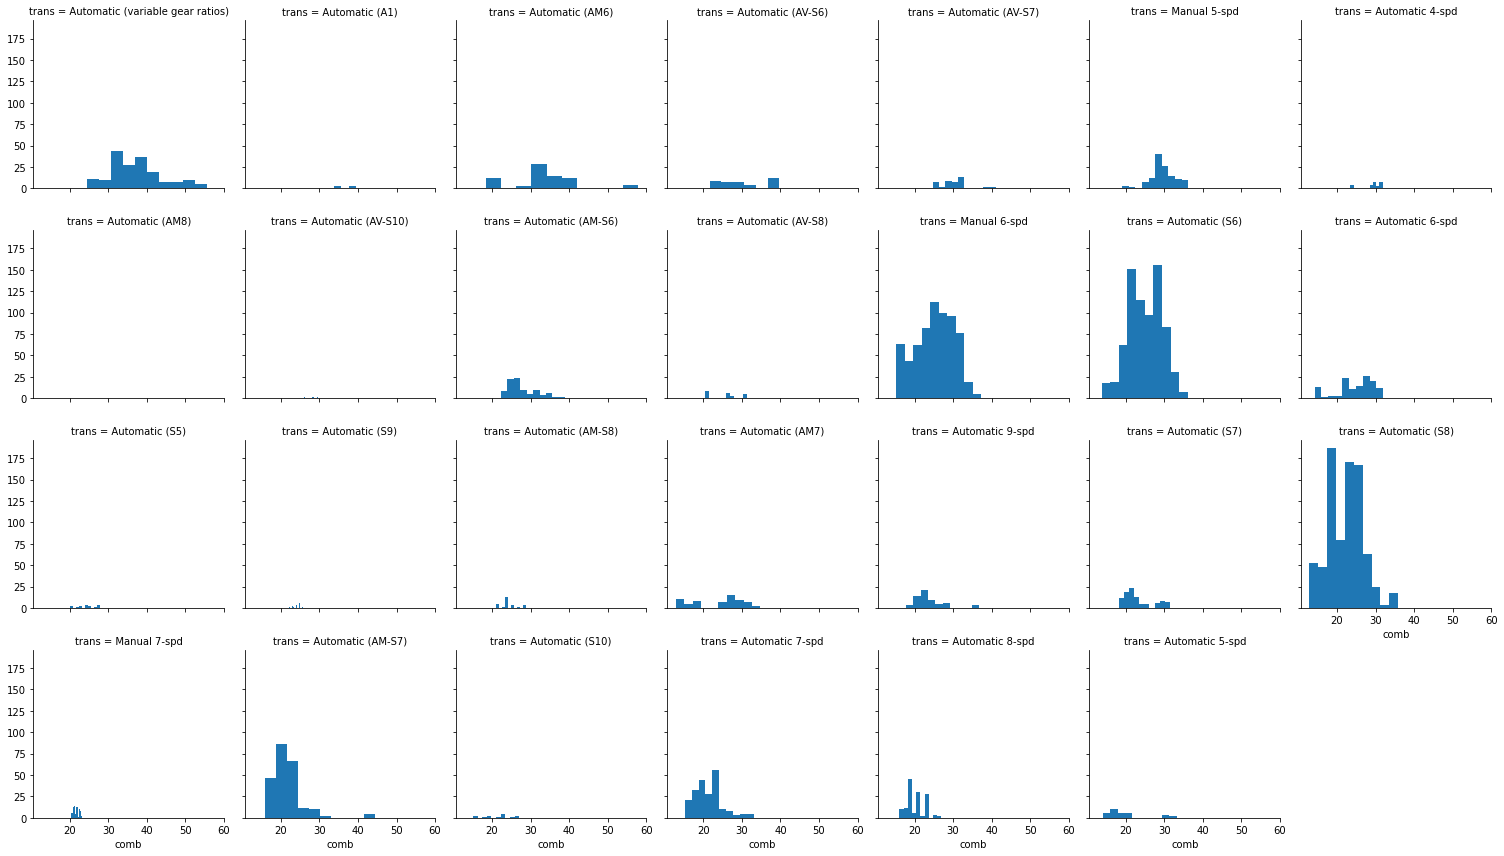

In [52]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sns.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb')


In [54]:
fuel_econ["comb"]

0       18.7389
1       25.2227
2       20.6716
3       19.8774
4       28.6813
         ...   
3924    54.4329
3925    41.0000
3926    42.0000
3927    23.0021
3928    21.3945
Name: comb, Length: 3929, dtype: float64

### Adapted Bar Charts
Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.


For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's barplot function:

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

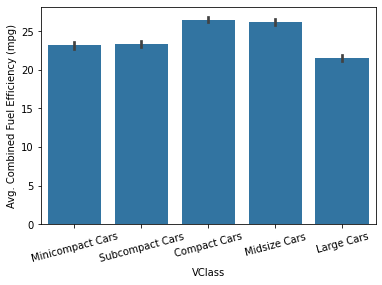

In [55]:
base_color = sns.color_palette()[0]
sns.barplot(data = fuel_econ, x = "VClass", y = "comb", color = base_color)
plt.xticks(rotation = 15);
plt.ylabel("Avg. Combined Fuel Efficiency (mpg)")

Different hues are automatically assigned to each category level unless a fixed color is set in the "color" parameter, like in countplot and violinplot.

The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size.

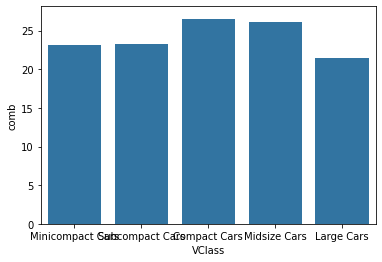

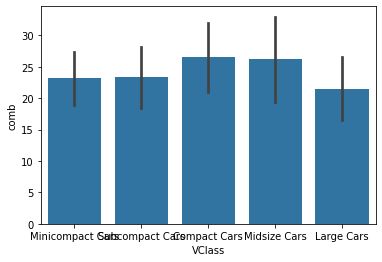

In [59]:
# Try these additional arguments
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0);
plt.show()
sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd');
plt.show()

As an alternative, the pointplot() function can be used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.



Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

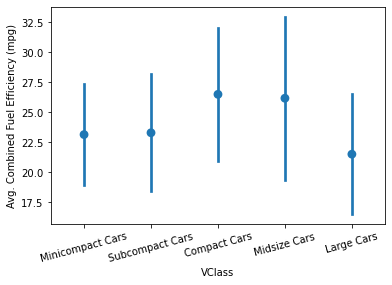

In [61]:
sns.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')


By default, pointplotwill connect values by a line. This is fine if the categorical variable is ordinal in nature, but it can be a good idea to remove the line via linestyles = "" for nominal data.

The above plots can be useful alternatives to the box plot and violin plot if the data is not conducive to either of those plot types. For example, if the numeric variable is binary in nature, taking values only of 0 or 1, then a box plot or violin plot will not be informative, leaving the adapted bar chart as the best choice for displaying the data.



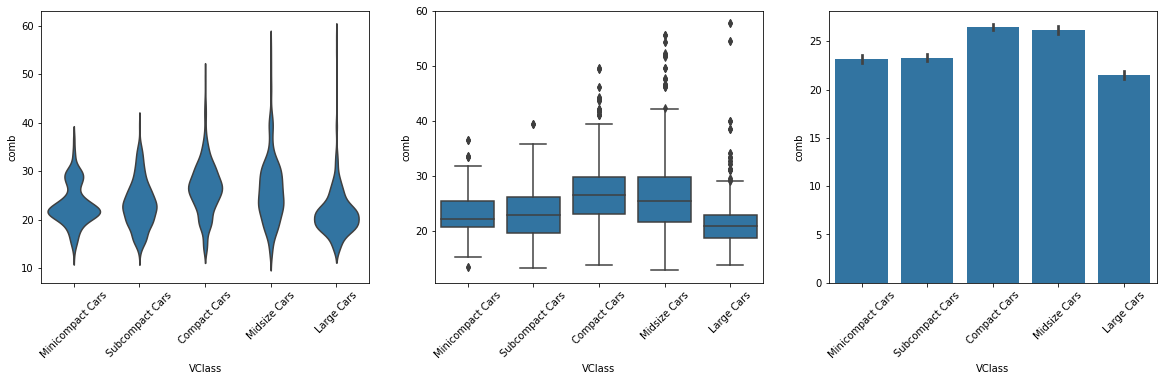

In [63]:
plt.figure(figsize = [20, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sns.violinplot(data=fuel_econ, x='VClass', y='comb', inner = None,
              color = base_color)
plt.xticks(rotation = 45); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sns.barplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);